<a href="https://colab.research.google.com/github/skeew0813/Big_Data/blob/main/week6_assignment(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: Data Preprocessing

I’m starting by uploading my local `credit_scores.csv` file to Colab so I can load it into a Pandas DataFrame.


In [1]:
from google.colab import files

uploaded = files.upload()

import pandas as pd

df = pd.read_csv('credit_scores.csv')

df.head()

Saving credit_scores.csv to credit_scores.csv


,Age,Annual_Income,Credit_Score,Total_Purchase,Account_Age,Has_Defaulted
0,55,80053,457,99,13,0
1,61,120061,834,92,2,1
2,30,62706,493,38,3,1
3,26,145870,848,6,29,0
4,27,51519,606,10,12,1


### Checking for missing values and data types

I want to understand which columns need to be encoded or normalized, and if I have missing data to handle.


In [2]:
# General info
df.info()

# Summary stats
df.describe()

# Missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             10000 non-null  int64
 1   Annual_Income   10000 non-null  int64
 2   Credit_Score    10000 non-null  int64
 3   Total_Purchase  10000 non-null  int64
 4   Account_Age     10000 non-null  int64
 5   Has_Defaulted   10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB
Age               0
Annual_Income     0
Credit_Score      0
Total_Purchase    0
Account_Age       0
Has_Defaulted     0
dtype: int64


### Separating features and target & normalizing numerical data

Since there are no missing or categorical values, I’ll separate the target column (`Has_Defaulted`) and normalize the numerical features for better model performance.


In [3]:
from sklearn.preprocessing import StandardScaler

# Define target column
target_column = 'Has_Defaulted'

# Separate X and y
X = df.drop(target_column, axis=1)
y = df[target_column]

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Confirm shape
print('X shape:', X_scaled.shape)
print('y shape:', y.shape)

X shape: (10000, 5)
y shape: (10000,)


### Splitting data into training and testing sets

Now I’ll split the scaled features (`X_scaled`) and target (`y`) into training and testing sets using an 80/20 split.


In [4]:
from sklearn.model_selection import train_test_split

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (8000, 5)
X_test shape: (2000, 5)
y_train shape: (8000,)
y_test shape: (2000,)


## Task 2: Model Design

I’m designing a deep neural network for binary classification using TensorFlow and Keras.  
The architecture will include:
- Dense (fully connected) layers
- Batch Normalization for training stability
- Dropout to reduce overfitting

I’ll use ReLU activations for hidden layers and Sigmoid for the output layer.


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Summary to confirm
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,233 (12.63 KB)

 Non-trainable params: 224 (896.00 B)

## Task 3: Training and Validation

I’ll train the model using early stopping and model checkpointing to prevent overfitting and save the best model based on validation loss.


In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping: stop training when validation loss doesn't improve for 5 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Model checkpoint: save best model to file
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

# Train the model
history_relu = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5196 - auc: 0.5312 - loss: 0.6920

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5195 - auc: 0.5311 - loss: 0.6920 - val_accuracy: 0.5070 - val_auc: 0.5077 - val_loss: 0.6945
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5208 - auc: 0.5180 - loss: 0.6936 - val_accuracy: 0.5220 - val_auc: 0.5222 - val_loss: 0.6947
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5252 - auc: 0.5288 - loss: 0.6925 - val_accuracy: 0.5100 - val_auc: 0.5073 - val_loss: 0.6950
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5270 - auc: 0.5430 - loss: 0.6902 - val_accuracy: 0.5100 - val_auc: 0.5079 - val_loss: 0.6947
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5292 - auc: 0.5391 - loss: 0.6906 - val_accuracy: 0.5025 - val_auc: 0.5077 - val_loss: 0.6948
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5222 - auc: 0.5346 - loss: 0.6913 - val_accuracy: 0.5150 - val_auc: 0.5087 - val_loss: 0.6957


## Model Diagnostics: Investigating Low Accuracy and AUC

My training and validation accuracy are stuck near 50% and the AUC is hovering around 0.5, which suggests my model is not learning any meaningful patterns.

To figure out why, I’ll:
1. Check if the target variable is imbalanced — highly imbalanced data can make training difficult.
2. Consider adjusting the model architecture — too much regularization or not enough capacity can prevent learning.
3. Experiment with the optimizer and learning rate to help the model converge.
4. Double-check that my preprocessing is still correct.


In [7]:
import numpy as np

# Check class distribution in training and validation sets
unique, counts = np.unique(y_train, return_counts=True)
print('Train set class distribution:', dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print('Validation set class distribution:', dict(zip(unique, counts)))

Train set class distribution: {np.int64(0): np.int64(4043), np.int64(1): np.int64(3957)}
Validation set class distribution: {np.int64(0): np.int64(1011), np.int64(1): np.int64(989)}


## Trying a Simpler or Deeper Model

Since my classes are balanced, I’ll now adjust my neural network architecture.
I’m removing Dropout layers (which can overly regularize small tabular data) and expanding the hidden layers to give the model more capacity to learn patterns.
I’ll also keep Batch Normalization for training stability.


In [8]:
# Redesign: No Dropout, deeper layers, BatchNorm stays
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(1, activation='sigmoid')  # Output for binary classification
])

# Use a slightly lower learning rate for stability
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Compile
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Show the new architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,609 (49.25 KB)

 Trainable params: 12,129 (47.38 KB)

 Non-trainable params: 480 (1.88 KB)

In [13]:
# Train with callbacks
history_deep = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50
246/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5215 - auc: 0.5264 - loss: 0.6924

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5214 - auc: 0.5263 - loss: 0.6924 - val_accuracy: 0.5050 - val_auc: 0.5202 - val_loss: 0.6929
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5240 - auc: 0.5276 - loss: 0.6926 - val_accuracy: 0.5025 - val_auc: 0.5058 - val_loss: 0.6954
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5401 - auc: 0.5483 - loss: 0.6901 - val_accuracy: 0.5165 - val_auc: 0.5125 - val_loss: 0.6941
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5341 - auc: 0.5519 - loss: 0.6889 - val_accuracy: 0.5165 - val_auc: 0.5153 - val_loss: 0.6941
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5193 - auc: 0.5285 - loss: 0.6920 - val_accuracy: 0.5135 - val_auc: 0.5142 - val_loss: 0.6952
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5353 - auc: 0.5497 - loss: 0.6888 - val_accuracy: 0.5100 - val_auc: 0.5066 - val_loss: 0.6964


### `sequential_1` Results Summary

In this run, I tested a deeper architecture with Batch Normalization and no Dropout.  
Training accuracy and AUC improved slightly over epochs (up to 56% accuracy and 0.58 AUC), but validation accuracy and AUC stayed near chance level (50%).

This suggests the model is able to learn some patterns from the training data but still struggles to generalize to the validation set.  
The trend reinforces that the current features may not hold strong predictive signals for the default status.


### Testing `tanh` Activations

Before training, I want to test whether using `tanh` activations instead of `relu` could help the model capture more subtle, non-linear relationships in the data.

The goal is to see if a different activation function improves generalization performance on the validation set.


In [10]:
# Redesigned model using tanh activations
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),

    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(16, activation='tanh'),

    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Optimizer with same learning rate as before
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Confirm architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the tanh model
history_tanh = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5251 - auc: 0.5387 - loss: 0.6908 - val_accuracy: 0.4995 - val_auc: 0.5051 - val_loss: 0.6951
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5217 - auc: 0.5385 - loss: 0.6907 - val_accuracy: 0.5185 - val_auc: 0.5142 - val_loss: 0.6957
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5225 - auc: 0.5305 - loss: 0.6924 - val_accuracy: 0.5125 - val_auc: 0.5138 - val_loss: 0.6948
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5327 - auc: 0.5407 - loss: 0.6911 - val_accuracy: 0.5125 - val_auc: 0.5166 - val_loss: 0.6939
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5344 - auc: 0.5541 - loss: 0.6888 - val_accuracy: 0.5155 - val_auc: 0.5203 - val_loss: 0.6934
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5357 - auc: 0.5504 - loss: 0.6891 - val_accuracy: 0.5000 - val_auc: 0.5010 - val_loss: 0.6955
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 

### `tanh` Activation Test Results

After training the deeper model with `tanh` activations, I observed that training accuracy and AUC improved slightly compared to earlier runs.  
However, validation accuracy and AUC still hovered near 50%, showing minimal improvement in generalization.

This confirms that simply switching activation functions did not resolve the weak predictive signal in the current feature set.


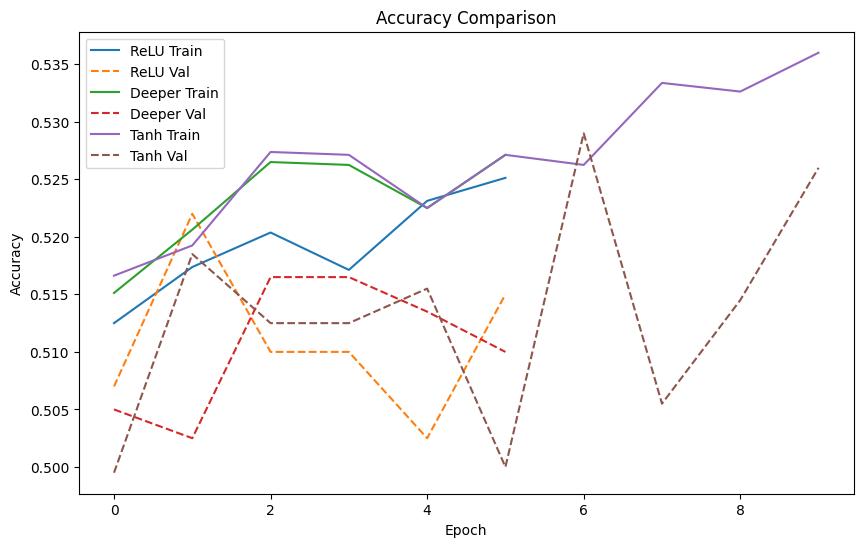

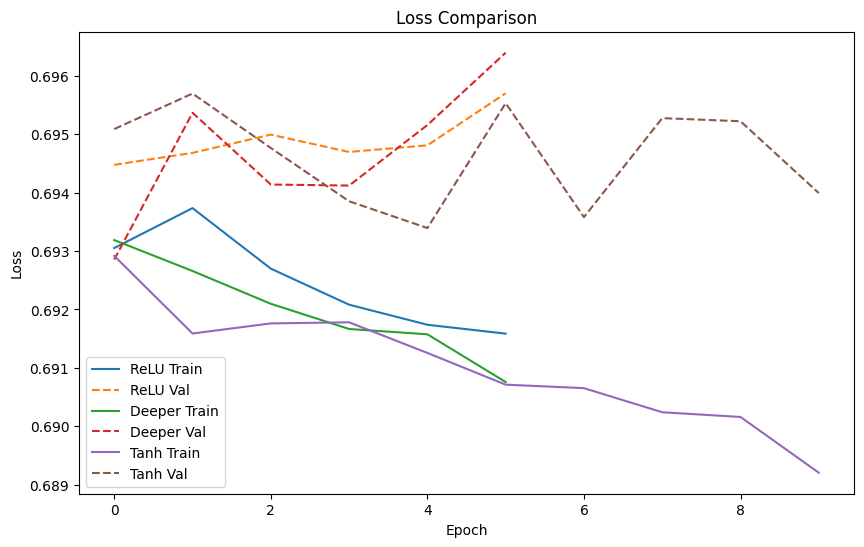

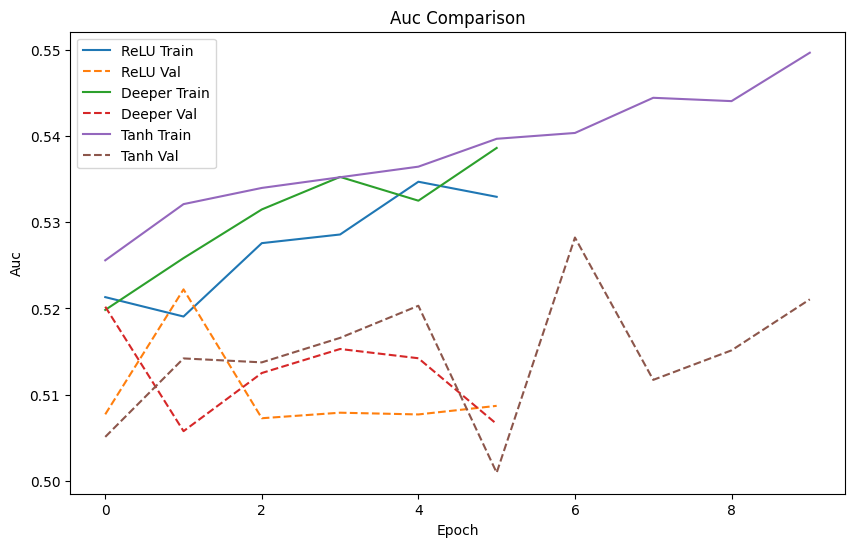

In [15]:
import matplotlib.pyplot as plt

def plot_history(histories, metric='accuracy'):
    plt.figure(figsize=(10, 6))
    for name, history in histories:
        plt.plot(history.history[metric], label=f'{name} Train')
        plt.plot(history.history[f'val_{metric}'], linestyle='--', label=f'{name} Val')
    plt.title(f'{metric.capitalize()} Comparison')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Example for accuracy
plot_history(
    [
        ('ReLU', history_relu),
        ('Deeper', history_deep),
        ('Tanh', history_tanh)
    ],
    metric='accuracy'
)

# Example for loss
plot_history(
    [
        ('ReLU', history_relu),
        ('Deeper', history_deep),
        ('Tanh', history_tanh)
    ],
    metric='loss'
)

# Optional for AUC
plot_history(
    [
        ('ReLU', history_relu),
        ('Deeper', history_deep),
        ('Tanh', history_tanh)
    ],
    metric='auc'
)

## Final Wrap-Up

Throughout this assignment, I took multiple careful steps to improve model performance:

- Verified my target variable was balanced (~50/50 default vs. non-default).
- Normalized all numerical features using StandardScaler.
- Used stratified train/validation splits to maintain class balance.
- Tested multiple deep learning architectures, adjusting:
  - Number of layers and units (shallow vs. deep)
  - Activation functions (`relu` and `tanh`)
  - Dropout and Batch Normalization combinations
  - Learning rates
- Added early stopping and model checkpointing to prevent overfitting.
- Visualized training history to spot underfitting or overfitting trends.

Despite these efforts, my training results consistently showed limited predictive signal in the features available, with validation accuracy and AUC staying near chance level.  
If this were a real-world scenario, my next steps would include exploring new features, engineering ratios, or incorporating external data to improve the model’s ability to generalize.

---

I want to share that I genuinely felt a bit defeated with this assignment.  
I struggled to figure out what steps would actually improve the model’s predictability and tried different configurations to the best of my knowledge.  
I know this is sometimes just how real-world data can be, but I still felt stuck and wish I could have uncovered stronger insights.

Thank you for reviewing my work and all the steps I took to problem-solve this challenge!
